In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from math import *

In [2]:
# workDir= '/Users/sabrinabms/Documents/INPE/doutorado/ENGOPT2012-experimento/arquivos_Elcio/dados/ComRuido/'
workDir= '/Users/sabrinabms/Documents/INPE/doutorado/ENGOPT2012-experimento/PlotarGraficos/'

In [3]:
radio = pd.read_csv(workDir+'radiossondagem.txt', "r", header=None, delimiter=r"\s+") 

In [4]:
tiko = pd.read_csv(workDir+'tikhonov1.txt', "r", header=None, delimiter=r"\s+") 

In [5]:
entropia = pd.read_csv(workDir+'entropia2.txt', "r", header=None, delimiter=r"\s+") 

In [6]:
saida_gen = pd.read_csv(workDir+'saida_gen.txt', "r", header=None, delimiter=r"\s+") 

In [7]:
radio.shape, tiko.shape, entropia.shape, saida_gen.shape

((486, 2), (40, 3), (40, 3), (40, 346))

In [8]:
tiko

,0,1,2
0,257.973,0.1,23.560
1,257.681,0.2,8.087
2,256.803,0.5,11.955
3,255.254,1.0,23.131
4,253.009,1.5,25.634
5,250.181,2.0,26.484
6,246.689,3.0,22.151
7,242.555,4.0,18.022
8,238.021,5.0,15.542
9,233.164,7.0,10.863


In [9]:
# fig, ax = plt.subplots(figsize=(5,10))
# ax.plot(x[::-1],niveis, marker = '*',label = "verdade")
# ax.plot(saida[::-1], niveis, marker = '.',label="saida RNA")
# ax.set(title = "Perfil de temperatura")
# plt.show()

In [10]:
radio_s = radio.to_numpy()
tiko_s = tiko.to_numpy()
entropia_s = entropia.to_numpy()
saida_gen_s = saida_gen.to_numpy()

In [11]:
saida_gen

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,0.304027,0.291437,0.293909,0.289291,0.300361,0.298705,0.297430,0.301330,0.292973,0.286236,...,0.277867,0.274520,0.278394,0.277021,0.286827,0.281719,0.293610,0.274934,0.275828,0.286806
1,0.341333,0.326345,0.329291,0.323789,0.336973,0.335001,0.333484,0.338125,0.328176,0.320146,...,0.310163,0.306168,0.310792,0.309153,0.320851,0.314759,0.328934,0.306662,0.307729,0.320826
2,0.385432,0.366274,0.370042,0.363002,0.379863,0.377343,0.375404,0.381335,0.368616,0.358340,...,0.345556,0.340439,0.346362,0.344262,0.359243,0.351442,0.369586,0.341072,0.342438,0.359210
3,0.395723,0.369074,0.374302,0.364542,0.387959,0.384451,0.381753,0.390011,0.372322,0.358094,...,0.340490,0.333480,0.341597,0.338716,0.359341,0.348581,0.373669,0.334346,0.336216,0.359296
4,0.392601,0.363256,0.369003,0.358277,0.384041,0.380174,0.377203,0.386302,0.366826,0.351202,...,0.331933,0.324281,0.333142,0.329995,0.352570,0.340780,0.368307,0.325225,0.327266,0.352521
5,0.385995,0.354929,0.361003,0.349672,0.376920,0.372824,0.369678,0.379316,0.358702,0.342208,...,0.321927,0.313895,0.323197,0.319892,0.343650,0.331230,0.360267,0.314885,0.317027,0.343598
6,0.365726,0.333115,0.339469,0.327626,0.356170,0.351866,0.348563,0.358691,0.337060,0.319847,...,0.298808,0.290516,0.300121,0.296705,0.321349,0.308441,0.338698,0.291537,0.293747,0.321295
7,0.344722,0.311558,0.317997,0.306004,0.334975,0.330592,0.327232,0.337544,0.315555,0.298149,...,0.276992,0.268692,0.278309,0.274885,0.299664,0.286662,0.317215,0.269712,0.271923,0.299609
8,0.326852,0.293437,0.299905,0.287866,0.317005,0.312584,0.309198,0.319598,0.297451,0.280001,...,0.258895,0.250648,0.260205,0.256799,0.281517,0.268527,0.299119,0.251661,0.253856,0.281462
9,0.307443,0.275763,0.281883,0.270495,0.298092,0.293898,0.290687,0.300553,0.279560,0.263064,...,0.243159,0.235394,0.244393,0.241185,0.264495,0.252237,0.281139,0.236348,0.238414,0.264444


In [15]:
# fig, ax = plt.subplots(figsize=(5,10))
# ax.plot(temreal[::-1],niveistr, marker = '*',label = "verdade")
# ax.plot(saida[::-1],niveis ,label="Radiossonda")
# ax.set(title = "Perfil de temperatura")
# plt.show()

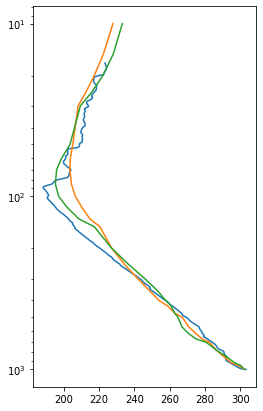

In [16]:
plt.subplots(figsize=(4,7))
plt.plot(radio_s[:,0],radio_s[:,1])
plt.plot(tiko_s[10:,0],tiko_s[10:,1])
plt.plot(entropia_s[10:,0],entropia_s[10:,1])
# plt.plot(saida_gen_s[:,1],entropia_s[:,1])
plt.yscale('log')
plt.gca().invert_yaxis()
plt.show()